<a href="https://colab.research.google.com/github/DT22179/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/Supervised Learning (Regression) - Capstone Project/Data/SeoulBikeData.csv', encoding='unicode_escape')

**------------------------------EDA - Know our data & data extraction------------------------------**

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
df.shape

(8760, 14)

In [ ]:
## Getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

*No null values present*

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [ ]:
df.duplicated().sum()

0

*No duplicate rows present*

In [ ]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

**Let's convert 'Date' column from object datatype to *datetime* datatype**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
dtype: object

**Extracting the *date, month & year* from 'Date' column and assigning it to new column respectively**

In [ ]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekday'] = df['Date'].dt.day_name()

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday


In [ ]:
## Let's drop the date column
df = df.drop('Date', axis=1)

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday


In [ ]:
df.dtypes

Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
Day                            int64
Month                          int64
Year                           int64
Weekday                       object
dtype: object

**------------------------------Univariate Analysis-----------------------------------**

Plotting histogram for the numerical features.

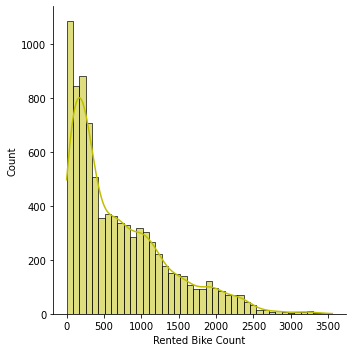

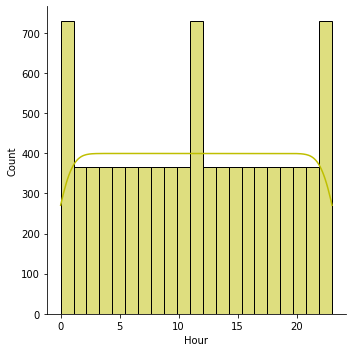

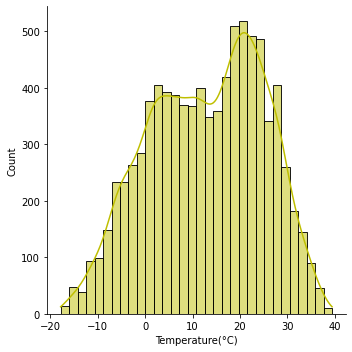

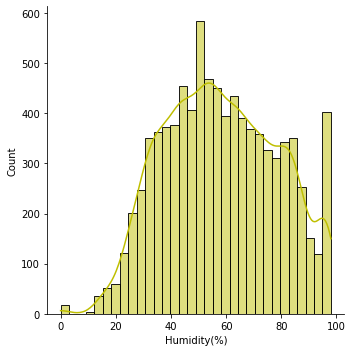

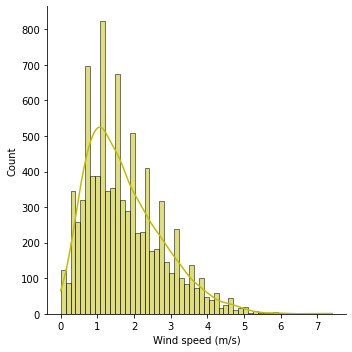

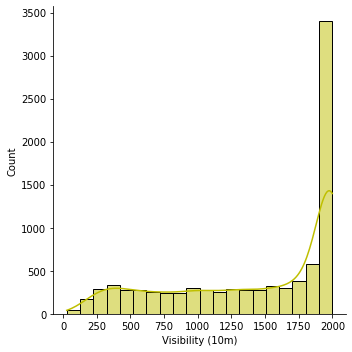

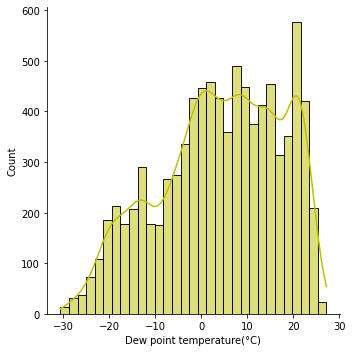

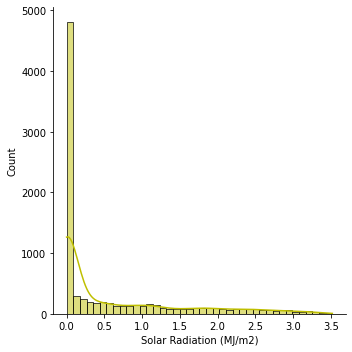

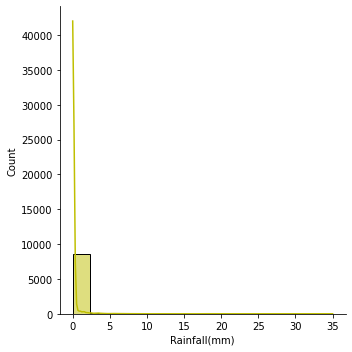

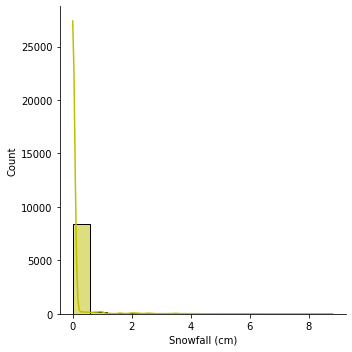

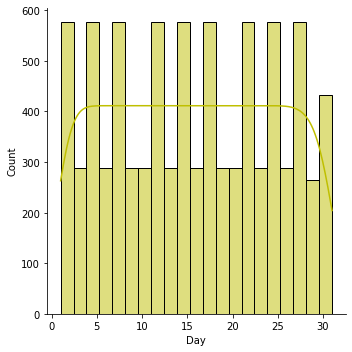

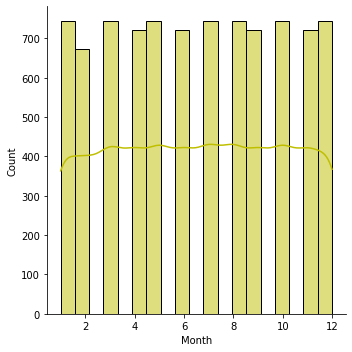

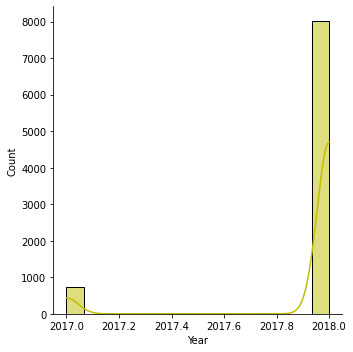

In [ ]:
for col_name in df.columns:
    if df[col_name].dtype == 'int' or df[col_name].dtype == 'float':
        sns.displot(df[col_name], kde=True, color='y')
        plt.xlabel(col_name)
        plt.show()

*We can observe that 'Rented Bike Count', 'Wind Speed', 'Visibility', 'Solar Radiation', 'Rainfall' & 'Snowfall' features are not normaly distributed*

*Also we can observe that most number of our data is from the year 2018*

**Converting Data**

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


**From the above summary of the data we can observe that Solar Radiation, Rainfall & Snowfall values starts from 50% or more. Thus, we can converts this features into categorical features as 1 or 0 with condition on certain threshold value**

In [ ]:
df['Solar Radiation (MJ/m2)'] = df['Solar Radiation (MJ/m2)'].apply(lambda x: 1 if x >= 0.56 else 0)
df['Rainfall(mm)'] = df['Rainfall(mm)'].apply(lambda x: 1 if x > 0.14 else 0)
df['Snowfall (cm)'] = df['Snowfall (cm)'].apply(lambda x: 1 if x > 0.07 else 0)

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes,12,1,2017,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes,12,1,2017,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0,0,0,Winter,No Holiday,Yes,12,1,2017,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes,12,1,2017,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes,12,1,2017,Thursday


In [ ]:
print(df['Holiday'].value_counts())
print('-'*50)
print(df['Functioning Day'].value_counts())

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
--------------------------------------------------
Yes    8465
No      295
Name: Functioning Day, dtype: int64


*Let us now change data type of 'Holiday' and 'Functioning Day' from object to int*

In [ ]:
df['Holiday'] = df['Holiday'].map({'No Holiday' : 0, 'Holiday' : 1})
df['Functioning Day'] = df['Functioning Day'].map({'No' : 0, 'Yes' : 1})

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0,0,0,Winter,0,1,12,1,2017,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0,0,0,Winter,0,1,12,1,2017,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0,0,0,Winter,0,1,12,1,2017,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0,0,0,Winter,0,1,12,1,2017,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0,0,0,Winter,0,1,12,1,2017,Thursday


In [ ]:
df[(df['Rented Bike Count'] >= 1) & (df['Functioning Day'] == 0)]

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday


*We can observe that no bikes were rented on non functioning day. Thus, it is better to drop all the rows with functioning day as 0*

In [ ]:
df = df[df['Functioning Day'] == 1]

In [ ]:
df.shape

(8465, 17)

In [ ]:
df[df['Functioning Day'] == 0] 

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday


In [ ]:
df[(df['Rented Bike Count'] >= 1) & (df['Holiday'] == 0)]

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0,0,0,Winter,0,1,12,1,2017,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0,0,0,Winter,0,1,12,1,2017,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0,0,0,Winter,0,1,12,1,2017,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0,0,0,Winter,0,1,12,1,2017,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0,0,0,Winter,0,1,12,1,2017,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0,0,0,Autumn,0,1,30,11,2018,Friday
8756,764,20,3.4,37,2.3,2000,-9.9,0,0,0,Autumn,0,1,30,11,2018,Friday
8757,694,21,2.6,39,0.3,1968,-9.9,0,0,0,Autumn,0,1,30,11,2018,Friday
8758,712,22,2.1,41,1.0,1859,-9.8,0,0,0,Autumn,0,1,30,11,2018,Friday


**----------------------------Multivariate Analysis - Plotting relation between our features--------------------------------**

In [ ]:
## Defining a function for plotting a bargraph
def barplot(x, y, hue):
    plt.figure(figsize=(10,6))
    sns.barplot(x=x, y=y, hue=hue, data=df)

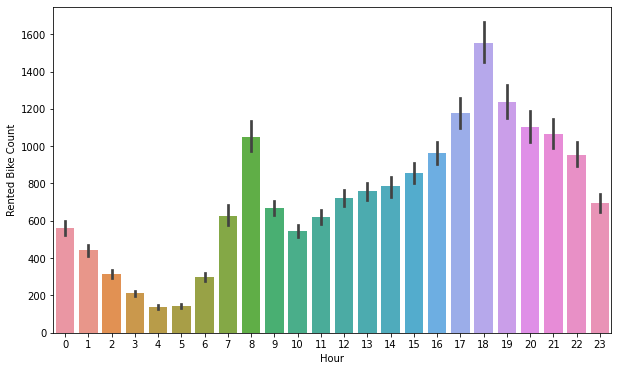

In [ ]:
barplot('Hour', 'Rented Bike Count', hue=None)

*We can observe that most number of bikes are rented in between 17:00 hrs to 21:00 hrs*

Now let's check number of bikes rented during solar radiation, rainfall and snowy days.

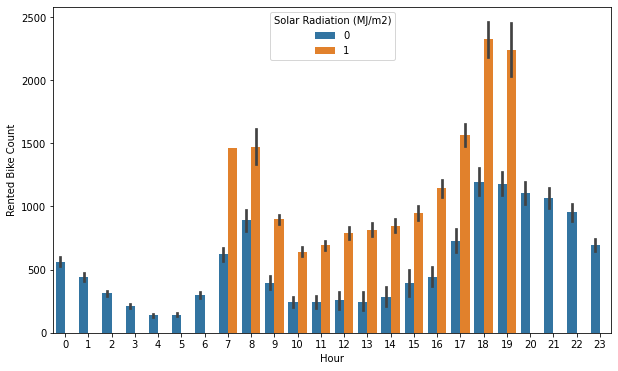

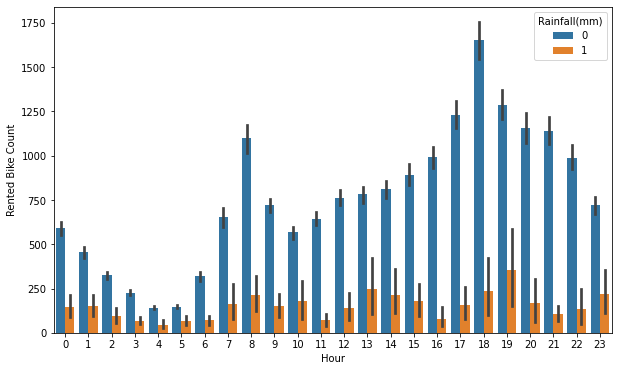

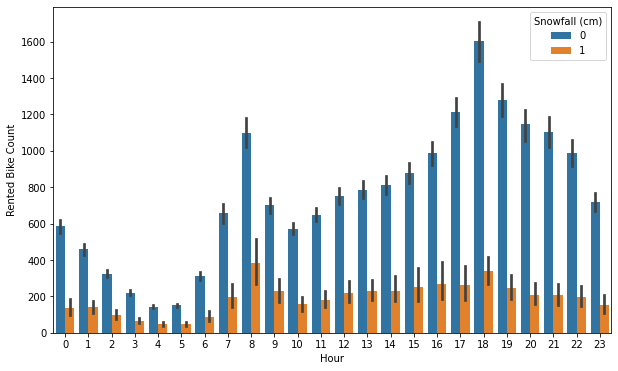

In [ ]:
hue = ['Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
for col in hue:
    barplot('Hour', 'Rented Bike Count', col)
    plt.show()

*We can clearly observe that snowfall and rainy day effects the count of rented bike. But that's not the case for Solar Radiation.*

Now let us check rented bike count w.r.t Holiday dusring each hour.

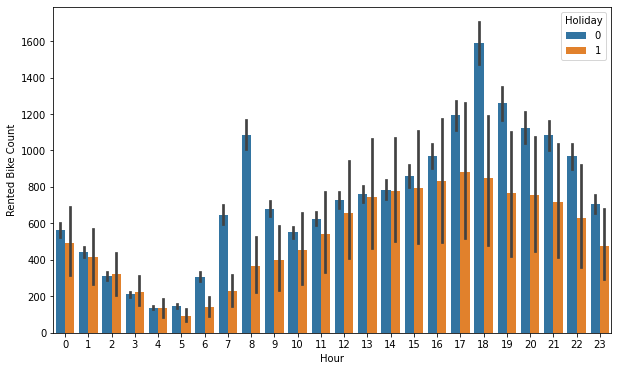

In [ ]:
barplot('Hour', 'Rented Bike Count', 'Holiday')

*We can observe that there's some impact of holiday on rented bike counts*

Now let's plot rented bike count w.r.t. each season

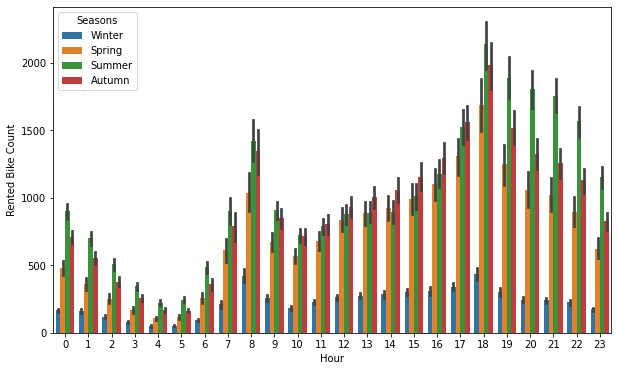

In [ ]:
barplot('Hour', 'Rented Bike Count', 'Seasons')

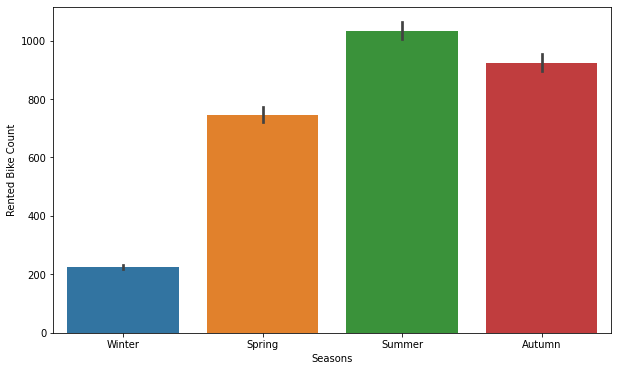

In [ ]:
barplot('Seasons', 'Rented Bike Count', None)

*We can observe that dusring winter, number of bike count rented is lowest and during summer it is the highest. From this we can assume that most of the peolple like to commute walking by enjoying the blissful season of winter.*

Let's plot relationship between Weekday and rented bike counts w.r.t. Holiday and individually too.

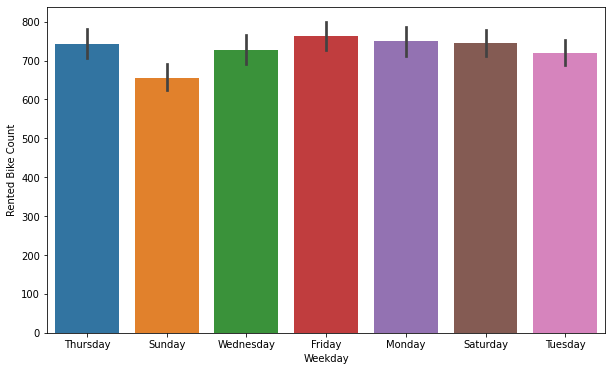

In [ ]:
barplot('Weekday', 'Rented Bike Count', None)

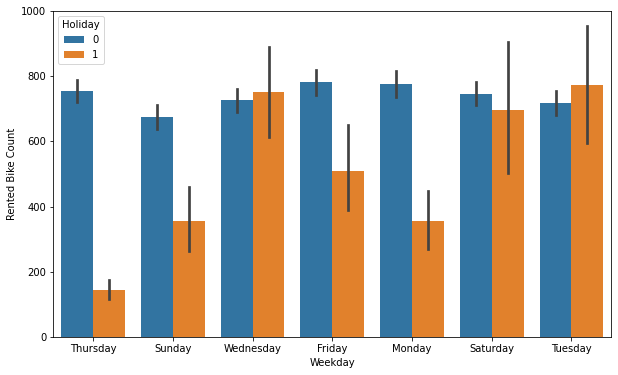

In [ ]:
barplot('Weekday', 'Rented Bike Count', 'Holiday')

*We can observe that least number of bike are rented on Sunday. Rest of the days the count of bike rented is approximately equal. Also Holiday don't have much impact as on wednesday, Saturday and Sunday, but it do have impact on rest of the days.*

Let's plot number of bike rented on each particular date of a month.

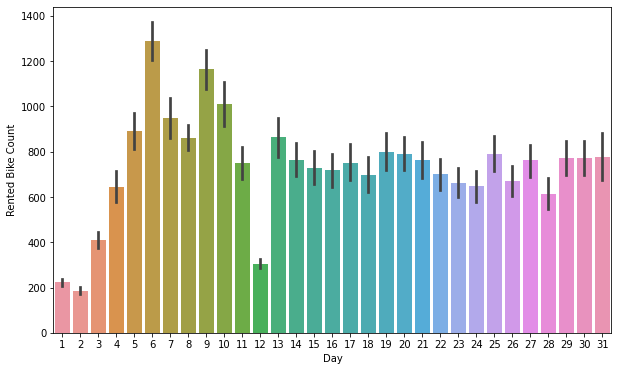

In [ ]:
barplot('Day', 'Rented Bike Count', None)

*We can observe that most number of bikes are rented from 5th of the month to 10th. Least number of bikes are rented on 1st, 2nd & 12th of any month. Also number of bike rented is approximately equal from 13th till 31st.*

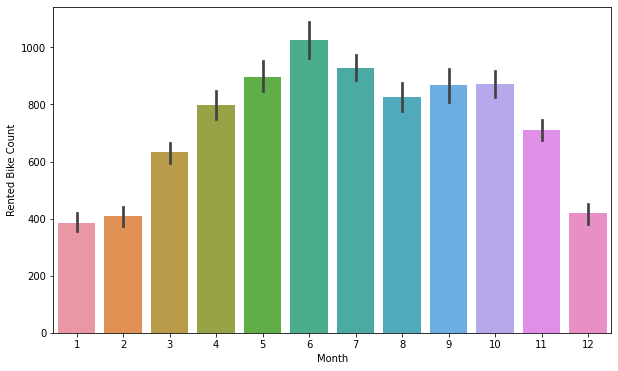

In [ ]:
barplot('Month', 'Rented Bike Count', None)

*Highest number of bikes rented are during the month of May, June and July. Whereas January, February & December falls on the lowest side.*

*Let us check if holiday have any impact on rented bikes w.r.t. Date*

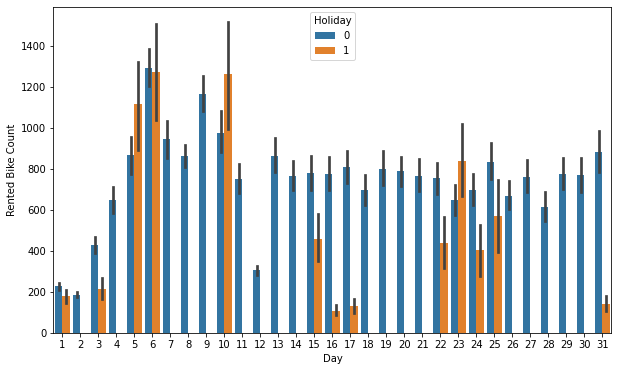

In [ ]:
barplot('Day', 'Rented Bike Count', 'Holiday')

*We can observe that approximately there are 13 holidays in a month. Most holidays dont have any impact on rented bike count*

Until now we have visualized the relationship for most of the categorical or discrete features. Let us not dive into visualization for numerical features and get some more insights before we jump into feature engineering process.

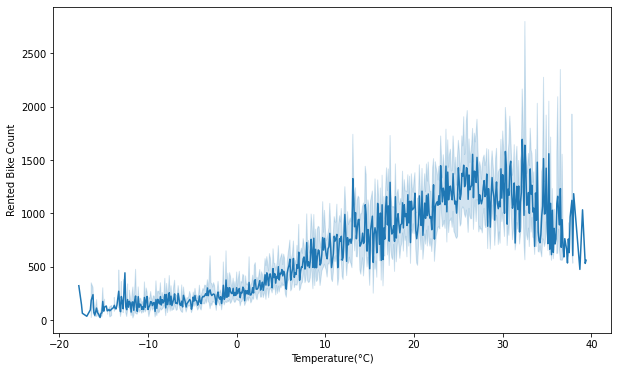

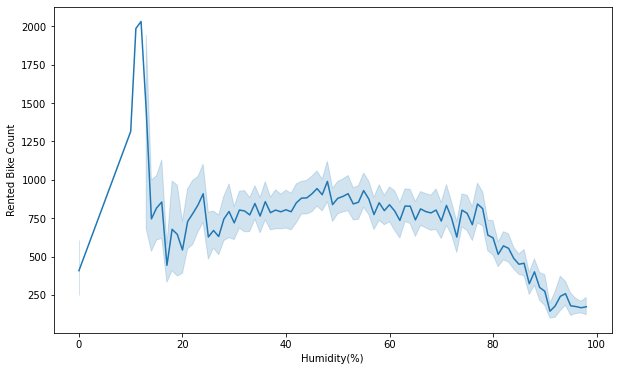

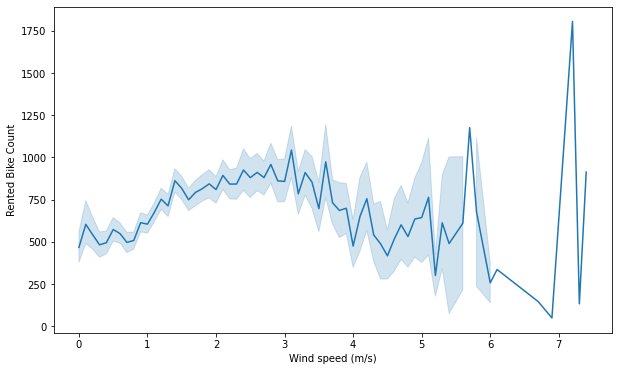

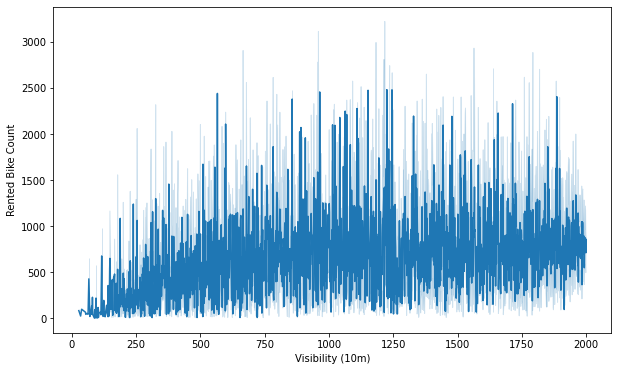

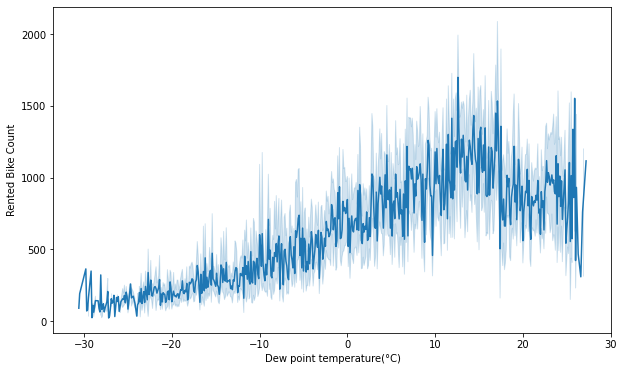

In [ ]:
continuous_features = ['Temperature(°C)',	'Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)', 'Dew point temperature(°C)']
for col in continuous_features:
  plt.figure(figsize=(10,6))
  sns.lineplot(x=col,y='Rented Bike Count',data=df,palette='Grouped')

*We can obsrrve that, with increase in temperature there's increase in rented bike counts. However, more number of bikes are rented if there's low humidity(Between 10% - 18%) from 20% humidity onwards, rented bike counts falls, Also higher the windspeed(more than 5 m/s) than higher the number of rented bike counts. Visibility generally don't have much impact but the number of rented bikes are less if there's low visibility. Thus visibility must be more than 500 (10 m) for getting more number of bikes rented. Dew point remperature is linearly related to rented bike count as more the dew point temperature, higher the number of bikes rented.*

We know that each and every record in our dataset is for functioning day. So there's no any need to keep functionig day as a feature. So let us start with dropping the functioning day column

In [ ]:
df = df.drop('Functioning Day', axis=1)

**Let's check for correlation between our features**

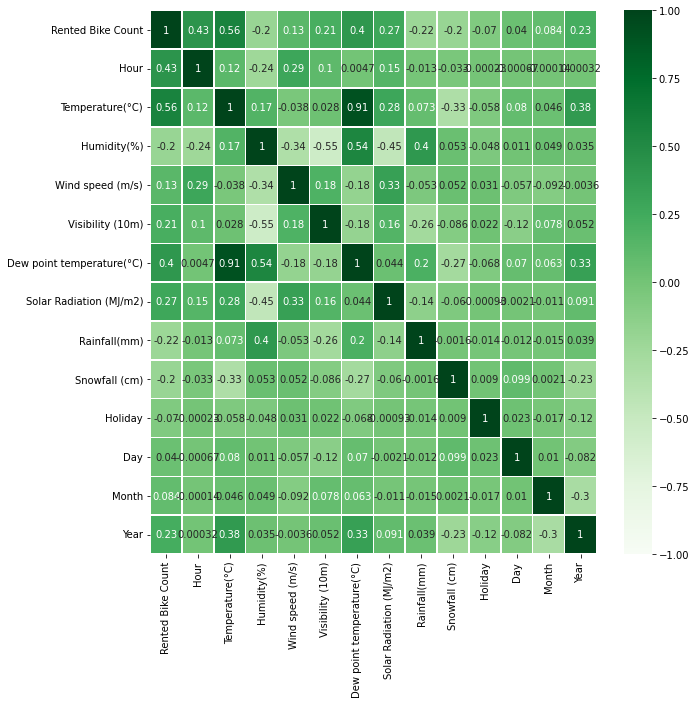

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth = 0.5, vmin=-1, vmax=1, cmap = 'Greens')

*We can observe that Dew Point Temperature is highly correlated with Temperaturer. Hence, we will drop dew point temperature*

In [ ]:
df.drop('Dew point temperature(°C)', inplace = True, axis = 1)

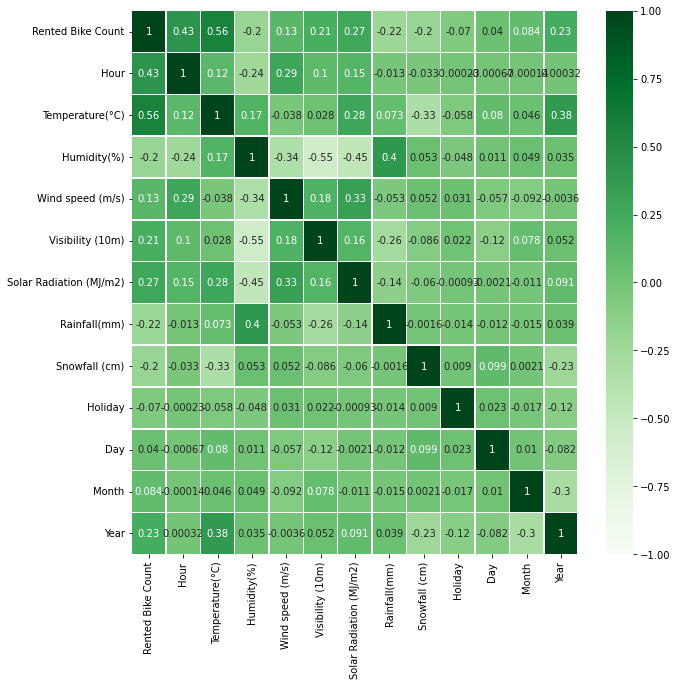

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth = 0.5, vmin=-1, vmax=1, cmap = 'Greens')

**As of now we're pretty much done with our exploratory data analysis. So let us go ahead with feature engineering.**

**-------------------------Feature Engineering---------------------------**

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day,Month,Year,Weekday
0,254,0,-5.2,37,2.2,2000,0,0,0,Winter,0,12,1,2017,Thursday
1,204,1,-5.5,38,0.8,2000,0,0,0,Winter,0,12,1,2017,Thursday
2,173,2,-6.0,39,1.0,2000,0,0,0,Winter,0,12,1,2017,Thursday
3,107,3,-6.2,40,0.9,2000,0,0,0,Winter,0,12,1,2017,Thursday
4,78,4,-6.0,36,2.3,2000,0,0,0,Winter,0,12,1,2017,Thursday


*Now let's handle a categorical variable by getting the dummy values*

In [ ]:
df = pd.get_dummies(df, columns = ['Seasons', 'Year', 'Weekday'])

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Day,Month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Year_2017,Year_2018,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,254,0,-5.2,37,2.2,2000,0,0,0,0,12,1,0,0,0,1,1,0,0,0,0,0,1,0,0
1,204,1,-5.5,38,0.8,2000,0,0,0,0,12,1,0,0,0,1,1,0,0,0,0,0,1,0,0
2,173,2,-6.0,39,1.0,2000,0,0,0,0,12,1,0,0,0,1,1,0,0,0,0,0,1,0,0
3,107,3,-6.2,40,0.9,2000,0,0,0,0,12,1,0,0,0,1,1,0,0,0,0,0,1,0,0
4,78,4,-6.0,36,2.3,2000,0,0,0,0,12,1,0,0,0,1,1,0,0,0,0,0,1,0,0


In [ ]:
df.shape

(8465, 25)

*Now we have 8465 rows and 25 features(columns)*

**Before starting to train our dataset we will copy our dataframe to other instance to ensure efficiency if there's a need of change.**

In [ ]:
df_1 = df.copy()

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Day,Month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Year_2017,Year_2018,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,254,0,-5.2,37,2.2,2000,0,0,0,0,12,1,0,0,0,1,1,0,0,0,0,0,1,0,0
1,204,1,-5.5,38,0.8,2000,0,0,0,0,12,1,0,0,0,1,1,0,0,0,0,0,1,0,0
2,173,2,-6.0,39,1.0,2000,0,0,0,0,12,1,0,0,0,1,1,0,0,0,0,0,1,0,0
3,107,3,-6.2,40,0.9,2000,0,0,0,0,12,1,0,0,0,1,1,0,0,0,0,0,1,0,0
4,78,4,-6.0,36,2.3,2000,0,0,0,0,12,1,0,0,0,1,1,0,0,0,0,0,1,0,0


In [ ]:
df_1.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Day,Month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Year_2017,Year_2018,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,254,0,-5.2,37,2.2,2000,0,0,0,0,12,1,0,0,0,1,1,0,0,0,0,0,1,0,0
1,204,1,-5.5,38,0.8,2000,0,0,0,0,12,1,0,0,0,1,1,0,0,0,0,0,1,0,0
2,173,2,-6.0,39,1.0,2000,0,0,0,0,12,1,0,0,0,1,1,0,0,0,0,0,1,0,0
3,107,3,-6.2,40,0.9,2000,0,0,0,0,12,1,0,0,0,1,1,0,0,0,0,0,1,0,0
4,78,4,-6.0,36,2.3,2000,0,0,0,0,12,1,0,0,0,1,1,0,0,0,0,0,1,0,0


**Importing Libraries to trai our data and building a machine learning model**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

**Splitting our input features and target feature**

In [ ]:
X = df_1.drop('Rented Bike Count', axis = 1)
y = df_1['Rented Bike Count']

In [ ]:
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Day,Month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Year_2017,Year_2018,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,0,-5.2,37,2.2,2000,0,0,0,0,12,1,0,0,0,1,1,0,0,0,0,0,1,0,0
1,1,-5.5,38,0.8,2000,0,0,0,0,12,1,0,0,0,1,1,0,0,0,0,0,1,0,0
2,2,-6.0,39,1.0,2000,0,0,0,0,12,1,0,0,0,1,1,0,0,0,0,0,1,0,0
3,3,-6.2,40,0.9,2000,0,0,0,0,12,1,0,0,0,1,1,0,0,0,0,0,1,0,0
4,4,-6.0,36,2.3,2000,0,0,0,0,12,1,0,0,0,1,1,0,0,0,0,0,1,0,0


In [ ]:
y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8465, dtype: int64

**Implementing Linear Regression**

R^2 Score : 0.5511739358478436
Adj R^2 is 0.544716006867237
RMSE is: 419.99745801962837


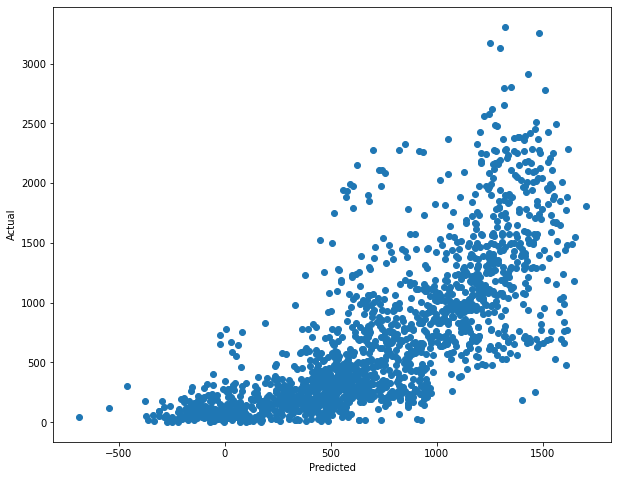

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(10,8))
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'R^2 Score : {model.score(X_test,y_test)}')
print(f'Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}')
print(f'RMSE is: {mean_squared_error(y_test,y_pred,squared=False)}')

*We can observe that - rmse is 419 and r2_score is 55%. Thus, linear regression is not performing good for the given problem and we can look forward for other models*

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Implementing RandomForestRegressor**

In [ ]:
##Hyperparameter tuning We wil use randomized search
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}
rfr = RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rfr,param_distributions = random_grid,cv = 5, verbose=2, random_state=0, n_jobs = -1)

In [ ]:
rfr_model = rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
## Priniting the best parameters
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': True}  



In [ ]:
##Using the best parameters to train our model
rfr_model_final = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, min_samples_leaf = 3, max_features = 'auto', max_depth = 90, bootstrap = True)
rfr_model_final.fit(X_train, y_train)

RandomForestRegressor(max_depth=90, min_samples_leaf=3, min_samples_split=10)

**Predicting the output based on *RandomForestRegressor* and plotting & also evaluating out model**

R^2 Score : 0.8567413443126484
Adj R^2 is 0.8546800686912477
RMSE is: 237.28378592263132


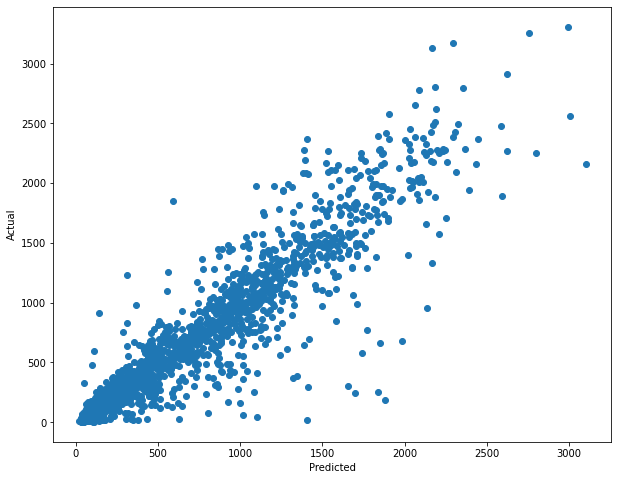

In [ ]:
y_pred = rfr_model_final.predict(X_test)
plt.figure(figsize=(10,8))
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'R^2 Score : {rfr_model_final.score(X_test,y_test)}')
print(f'Adj R^2 is {1-(1-rfr_model_final.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}')
print(f'RMSE is: {mean_squared_error(y_test,y_pred,squared=False)}')

*We can observe that random forest regressor is performing very well for a given problem with r2_Score of 86%.*

**--------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Implementing GradientBoostingRegressor**

In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
              }

gbr = GradientBoostingRegressor()

gbr_random = RandomizedSearchCV(estimator = gbr,param_distributions = parameters, cv = 5, verbose=2, random_state=0, n_jobs = -1)

In [ ]:
gbr_model = gbr_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
## Priniting the best parameters
print ('Random grid for GBR: ', parameters, '\n')
# print the best parameters
print ('Best Parameters for GBR: ', gbr_random.best_params_, ' \n')

Random grid for GBR:  {'learning_rate': [0.01, 0.02, 0.03, 0.04], 'subsample': [0.9, 0.5, 0.2, 0.1], 'n_estimators': [100, 500, 1000, 1500], 'max_depth': [4, 6, 8, 10]} 

Best Parameters for GBR:  {'subsample': 0.9, 'n_estimators': 1500, 'max_depth': 8, 'learning_rate': 0.04}  



In [ ]:
## Training our model on best parameters
gbr_final_model = GradientBoostingRegressor(learning_rate = 0.04, subsample = 0.9, n_estimators = 1500, max_depth = 8)
gbr_final_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.04, max_depth=8, n_estimators=1500,
                          subsample=0.9)

**Predicting the output based on *GradientBoostingRegressor* and plotting & also evaluating out model**

R^2 Score : 0.9100900822431299
Adj R^2 is 0.9087964143617361
RMSE is: 187.97990572870253


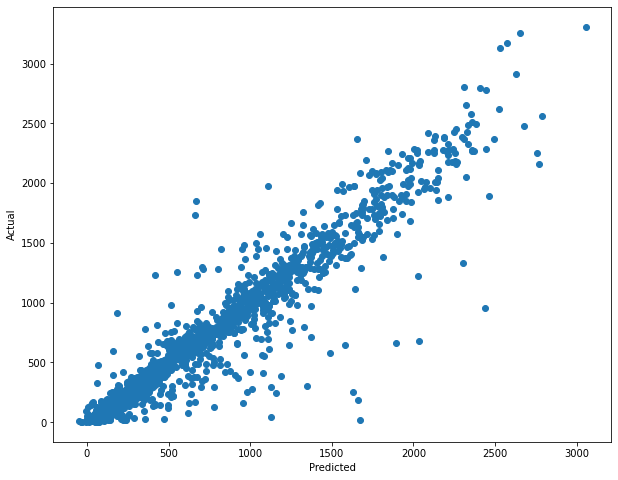

In [ ]:
##Predicting the output based on GBR & Plotting and also evaluating GBR model
y_pred = gbr_final_model.predict(X_test)
plt.figure(figsize=(10,8))
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'R^2 Score : {gbr_final_model.score(X_test,y_test)}')
print(f'Adj R^2 is {1-(1-gbr_final_model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}')
print(f'RMSE is: {mean_squared_error(y_test,y_pred,squared=False)}')

*Gradient boosting regressor is performing extremely well with 90% r2_Score. However time for hyperparameter tuning and training for gradient boosting regressor is 7 times more than that of random forest regressor. Thus, it's upto the business need which algorithm to choose*

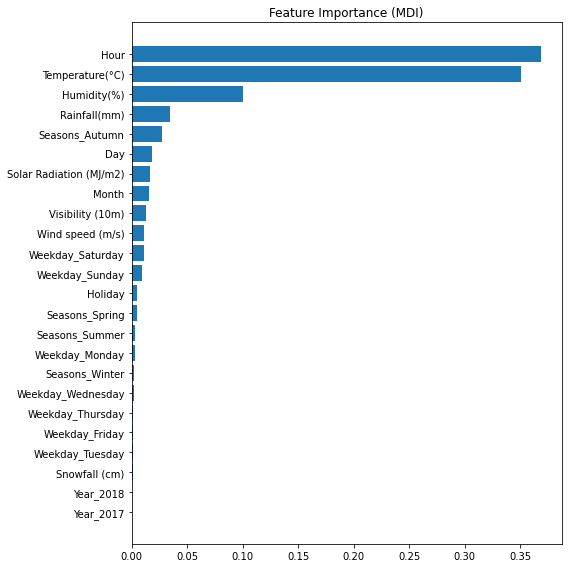

In [ ]:
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
#
feature_importance = gbr_final_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
result = permutation_importance(gbr_final_model, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()

*Hours, temperature and humidity are the most important features for the prediction of rented bikes count*

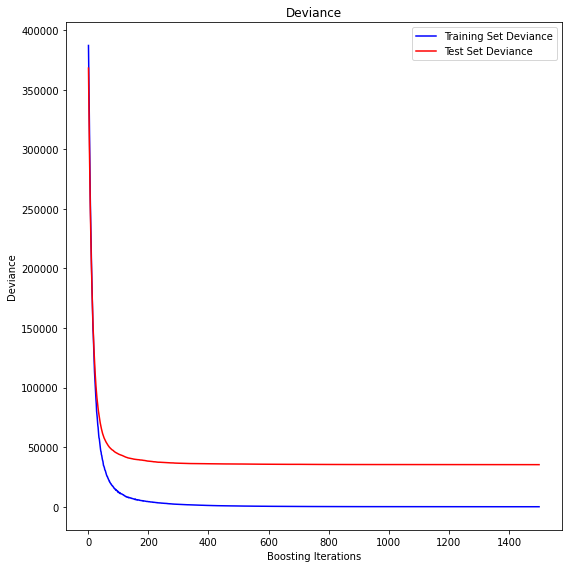

In [ ]:
test_score = np.zeros((1500), dtype=np.float64)
for i, y_pred in enumerate(gbr_final_model.staged_predict(X_test)):
    test_score[i] = gbr_final_model.loss_(y_test, y_pred)
 
fig = plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(1500) + 1, gbr_final_model.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(1500) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

**--------------------------------------------------------------------------------------------------------------------------------------------------------------**

##Conclusion - 
1. Most number of bikes are rented during evening time. 
2. In summer more number of bikes are rented whereas, winter has the lowest count. 
3. Least numbers of bike are rented on 12th of the month. 
4. More bikes are rented if the humidity is low and wind-speed is high. 
5. Rainfall and snowfall impact the number of bikes rented tremendously with very high downfall. 
6. Linear regression is not suitable for our problem as it makes many assumptions and our dataset is prone to it. Thus, linear regression gives us the lowest r2-score and highest rmse. 
7. Random forest regressor performs really good when compared to linear regression with high model performance and low rmse. But it's performance is low when compared to gradient boosting regressor. However, time taken for hyperparameter tuning and training the model is much low for random forest regressor then gradient boosting regressor. Thus, there's a tradeoff of accuracy and time in between random forest and gradient boosting regressor. It's up to us and business domain to which algorithm to use. 
8. Hour, temperature and solar radiation were the most important features for predicting the count of bikes required.